# CSS Bootcamp

## Day 4 (Multiple and logistic regression): Lab

This lab is intended to accompany **Day 4** of the week on **Statistics**, which focuses on:

- Building and interpreting **multiple linear regression** models.  
- The theoretical foundations of **logistic regression**.  
- Building and interpreting **logistic regression** models. 

This lab has some "free response" questions, in which you are asked to describe or make some inference from a graph. 

It also has questions requiring you to program answers in Python. In some cases, this will use built-in functions we've discussed in class (either today, or previous weeks). In others, there'll be a built-in function that we *haven't* discussed, which you will have to look up in the documentation. And in other cases, you'll be asked to write an original function.

Please reach out for help if anything is unclear!

#### Key imports

Here, we import some of the libraries that will be critical for the lab.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Part 1: Multiple linear regression

In this first section, we'll revisit a dataset from **Day 3**, which contains judgments about the **relatedness** of ambiguous words across different contexts.  

##### Load data

First, let's load a version of the dataset, which can be found in `data/lab/raw-c.csv`. (I've copied the same data file from the `data/lab` folder under the **Day 3** directory for ease of use.)

In [2]:
df_rawc = pd.read_csv("data/lab/raw-c.csv")
df_rawc.head(5)

word                sentence1              sentence2   same ambiguity_type  \
0  act  It was a desperate act.    It was a magic act.  False       Polysemy   
1  act  It was a desperate act.  It was a comedic act.  False       Polysemy   
2  act     It was a humane act.    It was a magic act.  False       Polysemy   
3  act     It was a humane act.  It was a comedic act.  False       Polysemy   
4  act  It was a desperate act.   It was a humane act.   True       Polysemy   

   mean_relatedness  distance_bert  distance_elmo  
0          2.181818       0.204110       0.034093  
1          2.000000       0.215616       0.045927  
2          2.818182       0.191488       0.042351  
3          2.809524       0.225272       0.057707  
4          3.900000       0.167990       0.041440

##### First, build a linear model using `statsmodels` predicting `mean_relatedness`, with `distance_bert` and `same` as predictors.

In [10]:
#### Your code here.

In [31]:
mod = smf.ols(formula='mean_relatedness ~ distance_bert + same', data=df_rawc).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_relatedness   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     431.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          4.83e-121
Time:                        13:15:04   Log-Likelihood:                -899.21
No. Observations:                 672   AIC:                             1804.
Df Residuals:                     669   BIC:                             1818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0296      0.101     20.009      0.000       1.830       2.229
same[T.True]      1.7987      0.088     20.491      0.000       1.626       1.971
distance_bert    -2.2182      0.287     -7.734      0.000      -2.781      -1.655
==============================================================================
Omnibus:                       42.275   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.123
Skew:                           0.662   Prob(JB):                     2.15e-11
Kurtosis:                       3.064   Cond. No.                         9.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Write out the linear equation corresponding to these parameters.

In [32]:
#### Your code here.

$\hat{Y} = 2.03 + 1.8X_{same} - 2.22X_{distance}$

##### According to this model, what is the predicted relatedness for `different sense` pairs that have a distance of $0.3$?

In [33]:
#### Your code here.

In [34]:
ans = 2.03 - 2.22*.3
ans

1.3639999999999999

##### According to this model, what is the predicted relatedness for `same sense` pairs that have a distance of $0.3$?

In [35]:
#### Your code here.

In [36]:
ans = 2.03 + 1.8 - 2.22*.3
ans

3.164

##### Use `predict` to collect the model's predictions, then plot them against the real values of `mean_relatedness`.

Note: when visualizing this, I found it helpful to use `sns.scatterplot`, and set the `hue` to `df_rawc['same']`. 

In [37]:
#### Your code here.

Text(0, 0.5, 'Actual relatedness')

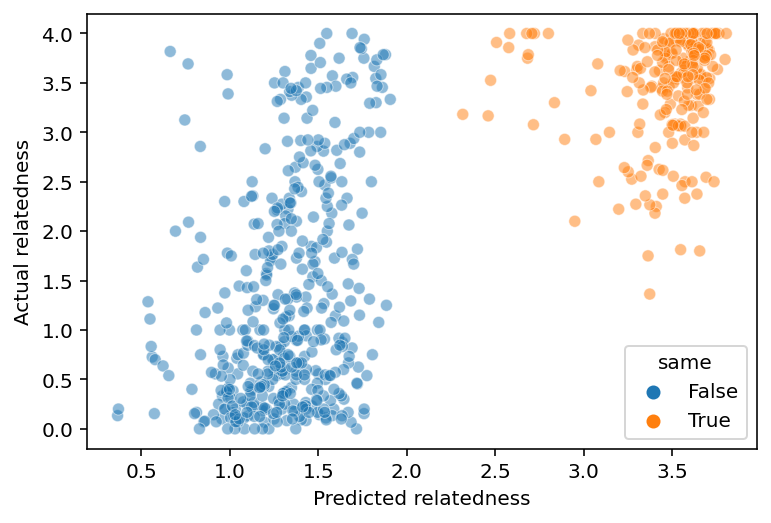

In [38]:
y_pred = mod.predict()
sns.scatterplot(x = y_pred, y = df_rawc['mean_relatedness'], hue = df_rawc['same'], alpha = .5)
plt.xlabel("Predicted relatedness")
plt.ylabel("Actual relatedness")

##### Plot the model's residuals against `distance_bert`. 

In [39]:
#### Your code here.

Text(0, 0.5, 'Residuals')

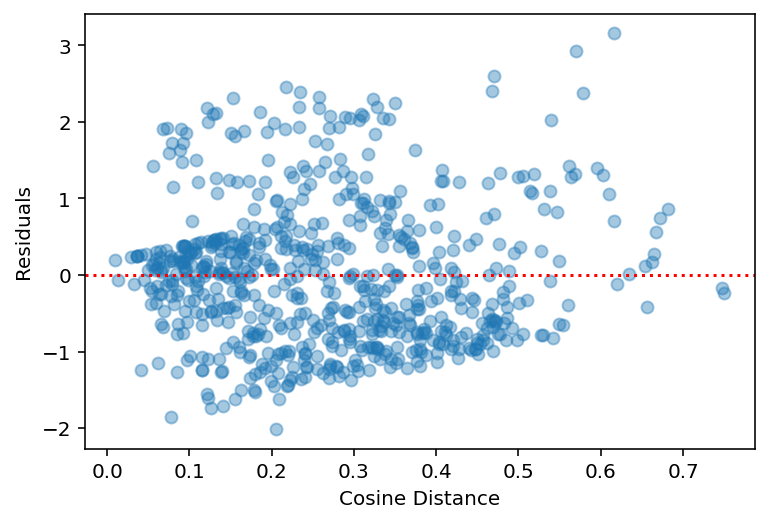

In [40]:
resid = mod.resid
plt.scatter(x = df_rawc['distance_bert'], y = resid, alpha = .4)
plt.axhline(y = 0, linestyle = "dotted", color = "red")
plt.xlabel("Cosine Distance")
plt.ylabel("Residuals")

##### How would you interpret these residuals? Is there evidence of heteroscedasticity?

In [41]:
#### Your response here.

##### Build and compare (visually, e.g., in a barplot) the $R^2$ of three models (described below).

- A model with only `same`. 
- A model with only `distance_bert`.
- A model with both parameters.

In [30]:
#### Your response here.

<AxesSubplot:xlabel='Model', ylabel='R-squared'>

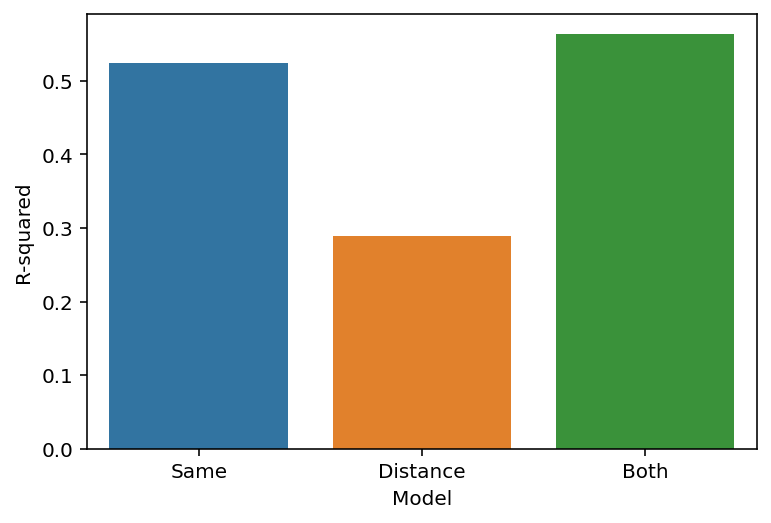

In [47]:
mod_same = smf.ols(formula='mean_relatedness ~ same', data=df_rawc).fit()
mod_distance = smf.ols(formula='mean_relatedness ~ distance_bert', data=df_rawc).fit()
mod_both = smf.ols(formula='mean_relatedness ~ distance_bert + same', data=df_rawc).fit()

df_results = pd.DataFrame({'R-squared': [mod_same.rsquared, mod_distance.rsquared, mod_both.rsquared],
                          'Model': ['Same', 'Distance', 'Both']})

sns.barplot(data = df_results,
           x = 'Model',
           y = 'R-squared')

##### Considering each of the "reduced" models (e.g., `Same` and `Distance`), which model has a bigger difference in $R^2$ with `Both`? What does this mean?

In [48]:
#### Your response here.

# Part 2: Logistic regression

### Predicting hiring discrimination.

In this section, we'll consider a [dataset](https://www.openintro.org/data/index.php?data=resume) from a [now well-known paper](https://www.aeaweb.org/articles?id=10.1257/0002828042002561) (Bertrand & Mullainathan , 2004). Here's what the authors did:

> We study race in the labor market by sending fictitious resumes to help-wanted ads in Boston and Chicago newspapers. To manipulate perceived race, resumes are randomly assigned African-American- or White-sounding names. 

The authors then measured whether resumes received a **callback** (yes or no).

Importantly, this was an **experiment**: resumes were randomly assigned to one of two treatment conditions (i.e., whether the name given was judged separately as being more likely to belong to an African-American or White applicant.)

#### Load data

The data can be found in `data/lab/resume.csv`). There are a *ton* of columns/variables here, but for our purposes, we're focused on just a couple:

- `received_callback`: whether or not a resume received a callback.  
- `years_experience`: how many years of experience the applicant has.  
- `race`: whether the resume was coded as `white` or `black`.  

In [83]:
df_resume = pd.read_csv("data/lab/resume.csv")
df_resume.head(2)

job_ad_id job_city   job_industry    job_type  job_fed_contractor  \
0        384  Chicago  manufacturing  supervisor                 NaN   
1        384  Chicago  manufacturing  supervisor                 NaN   

   job_equal_opp_employer job_ownership  job_req_any  job_req_communication  \
0                       1       unknown            1                      0   
1                       1       unknown            1                      0   

   job_req_education  ... honors  worked_during_school  years_experience  \
0                  0  ...      0                     0                 6   
1                  0  ...      0                     1                 6   

  computer_skills  special_skills volunteer military employment_holes  \
0               1               0         0        0                1   
1               1               0         1        1                0   

   has_email_address  resume_quality  
0                  0             low  
1                  1            high  

[2 rows x 30 columns]

##### How many observations are there in this dataset?

In [84]:
#### Your code here

In [85]:
len(df_resume)

4870

##### What proportion of people received a callback?

In [86]:
#### Your code here

In [87]:
df_resume['received_callback'].mean()

0.08049281314168377

##### How many resumes were coded as `white` and how many as `black`?

In [88]:
#### Your code here

In [89]:
df_resume['race'].value_counts()

white    2435
black    2435
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

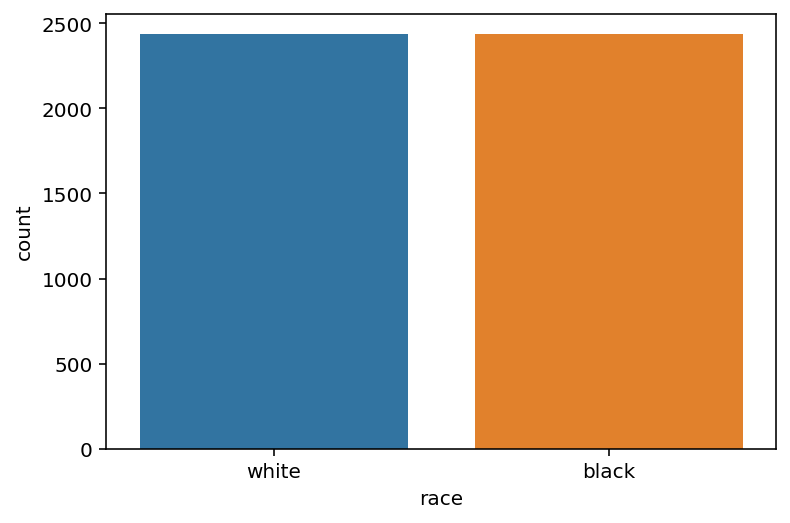

In [90]:
sns.countplot(data = df_resume, x = 'race')

##### What is the average `years_experience`, and what does the distribution look like?

In [91]:
#### Your code here

In [92]:
df_resume['years_experience'].mean()

7.842915811088296

<AxesSubplot:xlabel='years_experience', ylabel='Count'>

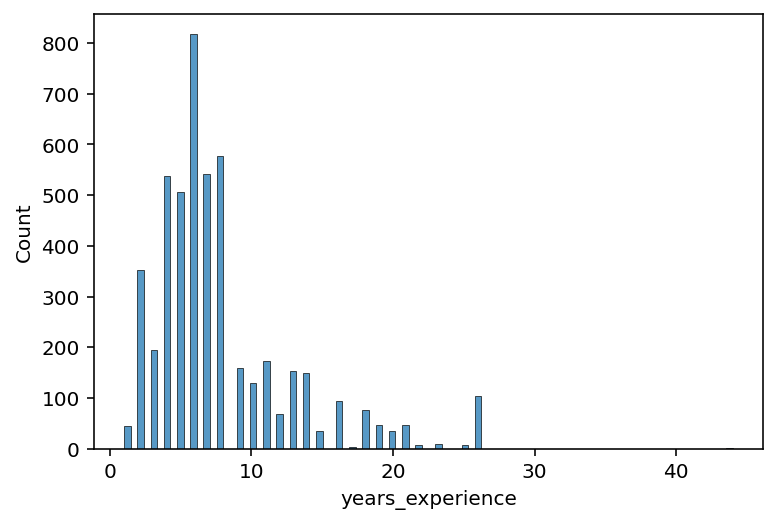

In [93]:
sns.histplot(data = df_resume, x = 'years_experience')

##### Let's start simple. Fit a model using `smf.logit` predicting `received_callback` from `years_experience`. 

In [94]:
#### Your code here

In [95]:
mod = smf.logit(formula='received_callback ~ years_experience', data=df_resume).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.278253
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4868
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                0.006137
Time:                        13:43:04   Log-Likelihood:                -1355.1
converged:                       True   LL-Null:                       -1363.5
Covariance Type:            nonrobust   LLR p-value:                 4.298e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7596      0.096    -28.687      0.000      -2.948      -2.571
years_experience     0.0391      0.009      4.257      0.000       0.021       0.057
====================================================================================
"""

##### Print out the parameters using `mod.params`.  

In [96]:
#### Your code here

In [97]:
mod.params

Intercept          -2.759604
years_experience    0.039080
dtype: float64

##### Write out the equation corresponding to these parameters.

Remember that $Y$ is actually the **log odds**, i.e., $log(\frac{p(y)}{1 - p(y)})$.

In [99]:
#### Your code here

$log(\frac{p(y)}{1 - p(y)}) = -2.76 + 0.03X_{experience}$

##### What is the predicted log-odds of someone with 2 years of experience getting a callback?

In [103]:
#### Your code here

In [104]:
log_odds = -2.76 + .03 * 2
log_odds

-2.6999999999999997

##### What is the predicted probability of someone with 2 years of experience getting a callback?

Recall that log-odds (here, $LO$) can be converted to probability using the following equation:

$\Large \frac{e^{LO}}{1 + e^{LO}}$

In [105]:
#### Your code here

In [106]:
np.exp(log_odds) / (1 + np.exp(log_odds))

0.06297335605699651

##### Consider a (ridiculous) range of years of experience, from $1$ to $200$. Use the equations above to produce a probability of getting a callback for each value of `years_experience`. Then plot these using `sns.lineplot`. 

In [115]:
#### Your code here

<AxesSubplot:>

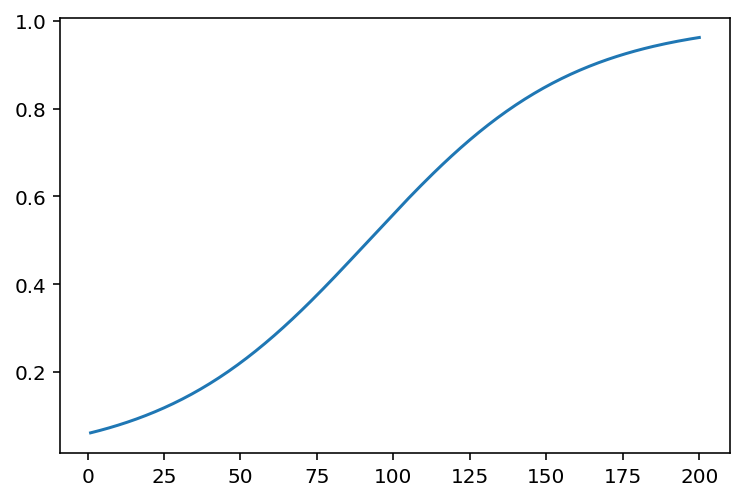

In [119]:
years = np.arange(1, 201) 
log_odds = -2.76 + .03 * years
probs = np.exp(log_odds) / (1 + np.exp(log_odds))

sns.lineplot(x = years, y = probs)

##### Now add `race` as a covariate to the model predicting `received_callback` (along with a covariate of `years_experience`). 

In [94]:
#### Your code here

In [120]:
mod = smf.logit(formula='received_callback ~ years_experience + race', data=df_resume).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.276514
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      received_callback   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4867
Method:                           MLE   Df Model:                            2
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                 0.01235
Time:                        15:08:21   Log-Likelihood:                -1346.6
converged:                       True   LL-Null:                       -1363.5
Covariance Type:            nonrobust   LLR p-value:                 4.880e-08
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.9989      0.116    -25.940      0.000      -3.226      -2.772
race[T.white]        0.4384      0.108      4.077      0.000       0.228       0.649
years_experience     0.0391      0.009      4.249      0.000       0.021       0.057
====================================================================================
"""

##### Compare the AIC of this more complex model to the model with just `years_experience`. 

In [94]:
#### Your code here

In [138]:
mod_full = smf.logit(formula='received_callback ~ years_experience + race', data=df_resume).fit(disp=0)
mod_simple = smf.logit(formula='received_callback ~ years_experience', data=df_resume).fit(disp=0)
print(mod_full.aic)
print(mod_simple.aic)

2699.2496455429973
2714.1857426767456


##### Which AIC is bigger? What does that mean about the more complex model? Is it better? Why or why not?

In [94]:
#### Your code here

##### Print out the parameters of the more complex model using `params`.  Are these significant?

In [139]:
#### Your code here

In [140]:
mod.params

Intercept          -2.998941
race[T.white]       0.438409
years_experience    0.039089
dtype: float64

##### Write out the equation corresponding to these parameters.

Remember that $Y$ is actually the **log odds**, i.e., $log(\frac{p(y)}{1 - p(y)})$.

In [141]:
#### Your code here

$log(\frac{p(y)}{1 - p(y)}) = -3 + 0.44X_{race} + 0.04X_{experience}$

##### How should we interpret the $\beta$ parameter for `race`? What does this mean?

Notes:

- Feel free to answer this qualitatively (we'll be more precise in a moment).
- This answer should include a reference to how the levels of `race` are coded.  

In [142]:
#### Your response here

##### What is the predicted log-odds of a Black applicant with 2 years of experience getting a callback?

In [143]:
#### Your code here

In [144]:
log_odds = -3 + .04*2
log_odds

-2.92

##### What is the predicted probability of a Black applicant with 2 years of experience getting a callback?

Recall that log-odds (here, $LO$) can be converted to probability using the following equation:

$\Large \frac{e^{LO}}{1 + e^{LO}}$

In [145]:
#### Your code here

In [146]:
np.exp(log_odds) / (1 + np.exp(log_odds))

0.051173700917091655

##### What is the predicted log-odds of a White applicant with 2 years of experience getting a callback?

In [147]:
#### Your code here

In [148]:
log_odds = -3 + 0.44 + .04*2
log_odds

-2.48

##### What is the predicted probability of a White applicant with 2 years of experience getting a callback?

Recall that log-odds (here, $LO$) can be converted to probability using the following equation:

$\Large \frac{e^{LO}}{1 + e^{LO}}$

In [149]:
#### Your code here

In [150]:
np.exp(log_odds) / (1 + np.exp(log_odds))

0.07727220213665989

##### Once again, consider a range of `years_experience` from $1$ to $200$. This time, use the parameters from the updated model to calculate `p(callback)` for this range. Do this twice––first assuming the applicants are Black, then assuming they are White.

In [151]:
#### Your code here

<AxesSubplot:>

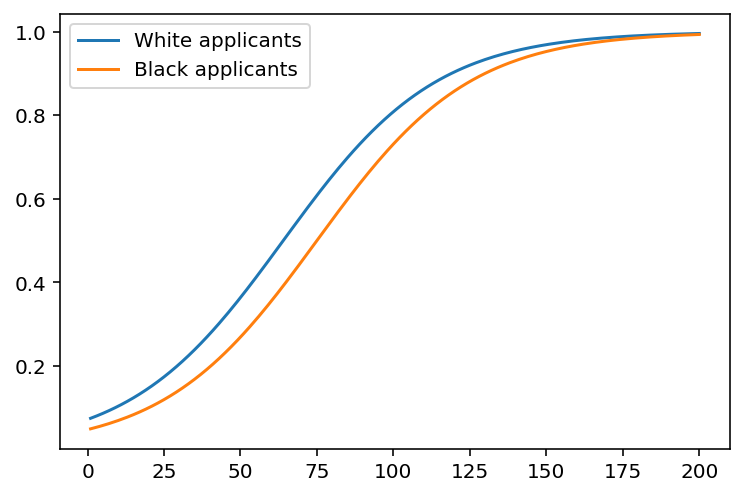

In [152]:
years = np.arange(1, 201) 
log_odds_white = -3 + 0.44 + .04*years
probs_white = np.exp(log_odds_white) / (1 + np.exp(log_odds_white))
log_odds_black = -3 + .04*years
probs_black = np.exp(log_odds_black) / (1 + np.exp(log_odds_black))

sns.lineplot(x = years, y = probs_white, label = "White applicants")
sns.lineplot(x = years, y = probs_black, label = "Black applicants")

##### Based on these results, what should we conclude about racial discrimination in the application process?

In [131]:
#### Your code here

For the **same years of experience**, resumes with White-coded names were more likely to receive a callback than resumes with Black-coded names.

# Conclusion

Congratulations! You've now:

- Built and interpreted multiple linear regression models.  
- Built and interpreted multiple logistic regression models.  
- Replicated some of the key analyses in a seminal paper looking at discrimination in the job market.  